## Introduction 
Antivenoms are antibodies purified from animals injected with small doses of venom, and are used to treat bites from venomous snakes. When the small dose of venom is injected into the host animal, they produce antibodies where the variable region is specific for binding to the antigen (toxin) and the constant region is specific for determining the function of the antibody. IgG (Immunoglobulin G) is a type of antibody that can bind and neutralize toxins, and is the type of antibody that is purified from host animals. Thus, I would like to use a multiple sequence alignment to find the similarities of the immunoglobulin heavy constant gamma 1 (IGHG1) in humans, mouse, cattle, horse and monkey. The IGHG1 gene sequence that is the most similar to the human IGHG1 sequence will be further analyzed to look at protein structure. This will hope to gain insight on which host animal IGHG1 is most similar to the human IGHG1, which would be the best host animal to use to produce antivenom antibodies. 

## Scientific Question
How can the production of antivenom antibodies be optimized in terms of the IgG antibodies that is generated in the host animal?

## Hypothesis 
If the immunoglobulin heavy constant gamma 1 (IGHG1) in mice, cattle, or horse is the most similar to the IGHG1 of human IgG, and the protein structure of the human IGHG1 and host animal IGHG1 is similar, then that host animal would produce IgG neutralizing antibody that would function in the most similar way as endogenous human IgG, which could give researchers an insight on which animal could produce the most effective antivenom antibodies to treat snakebites in humans. 

## Project Overview 
The data for this project was found ...

description of what analyses were done and how the data was downloaded for the project

The data for the first part of this project was found by searching "immunoglobulin heavy constant gamma 1 (IGHG1)" on NCBI, a few IGHG1 from interesting species were chosen, and the following nucleotide sequences were downloaded:
- Homo sapiens (human): https://www.ncbi.nlm.nih.gov/gene/3500
- Mus musculus (house mouse): https://www.ncbi.nlm.nih.gov/gene/16017
- Bos taurus (cattle): https://www.ncbi.nlm.nih.gov/gene/281850
- Equus caballus (horse): https://www.ncbi.nlm.nih.gov/gene/?term=Equus+caballus+IGHC1
- Macaca mulatta (Rhesus monkey): https://www.ncbi.nlm.nih.gov/gene/708891

## Loading in packages
Pandas: Pandas is a package that provides fast, flexible, and expressive data structure and is mainly used for data analysis on "relational" or "labeled" data. It can work with tabular data, ordered and unordered time series data, arbitrary mix data, and any other form of observationa;/ statistical data sets. The two primary structures of Pandas are series (1-dimensional) and DataFrame (2-dimensional). Pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries. More information about Pandas can be found here: https://pandas.pydata.org/docs/getting_started/overview.html  

Numpy: NumPy is a Python library that is used for working with arrays and conducts scientific computing. The ndarray object encapsulates n-dimensional arrays of homogeneous data types. NumPy arrays have a fixed size at creation, meaning that changing the size of an ndarray will create a new array and delete the original. Also, the elements in a NumPy array are all required to be of the same datatype. More information about NumPy can be found here: https://numpy.org/doc/stable/user/whatisnumpy.html

SciPy: Scipy is a collection of mathematical algorithms and functions that is built on the NumPy extension of Python. It provides high-level commands for manipulating and visualizing data. It also makes a powerful programming language available for use in developing sophisticated programs and specialized applications. SciPy is organized into subpackages that covers different scientific computing domains. More information about SciPy can be found here: https://docs.scipy.org/doc/scipy/tutorial/general.html

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns

from Bio import Align,SeqIO, pairwise2
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment

## Performing Bioinformatics Analysis
First, the nucleotide sequences files are loaded into the notebook. txt stands for text file, and it is a type of computer file that contains plain text in the form of lines. 

In [131]:
# load in the nucleotide sequences and make it a seq object 
# human, mouse, cattle, horse and monkey are global variables
human = next(SeqIO.parse("human_IgG1.txt", "fasta")).seq
mouse = next(SeqIO.parse("mouse_IgG1.txt", "fasta")).seq
cattle = next(SeqIO.parse("cattle_IgG1.txt", "fasta")).seq
horse = next(SeqIO.parse("horse_IgG1.txt", "fasta")).seq
monkey = next(SeqIO.parse("monkey_IgG1.txt", "fasta")).seq

In [118]:
# print the length of each sequence
print(len(human))
print(len(mouse))
print(len(cattle))
print(len(horse))
print(len(monkey))

990
1479
1203
1014
1378


## Part 1: Local Pairwise Alignment
Then, a pairwise local alignment is perfomed, comparing each species of interest to the human sequence. Local alignments finds local regions in the sequence with the highest level of similarity, and a score is calculated that determines can give an insight into how similiar two sequences are. I chose to perform a local alignment (over a global one) because I was unsure of how distantly related the sequences are. In addition, the sequences are of different lengths as well.

In [126]:
# define a function that perfroms the pairwise alignment 
def align_me(seq1, seq2):
    # alignment_seq1_seq2 is a local variable
    alignment_seq1_seq2 = pairwise2.align.localxx(seq1, seq2)
    print(format_alignment(*alignment_seq1_seq2[0]))

In [127]:
# local pairwise alignment between human and mouse
align_me(human, mouse)

2 C--CACCAAGGGCCCATCG-GTCT-TCCCC-CTGGCACCCT----C--CT-CC-AAGAGC-AC-CTC--TGGGGGCACA-GCAGCCCTGGGC-TGCCTGGTCAAGGA-CTACTTC-CCC-GAA-CCG-GTGACG-GTGT-CG-TGGAACTCAG-GCG--CCCTGA-CCAGCGGC-GTGCACACCTTCCCG-GCTGTCCTA-CAGTCCTCAGGACTCTACTC-C-CTC--AGCAGCGTG--GTGACCGTG-CCC-TCCAGCAGCT-TGGGCACC--C-AGACC-TACATC-TGCAACGTGAAT-CACA-AGCCCAG-C-A--A-CACCAAGGTGGACAAGAAAG-TTGA-GCCCAA---ATCT-TG-T-GACAA-AA-CTCA---CAC-ATGCCC-ACC-GTGCCCAGCACCTGA--ACTCCTGGGGGGACCGTCA-GTCTTCC-TCTTCCCCCCAAAA-CCCAAGGACA----C-C-CTCATGAT-CTCCCG-GACC-CCTGA-GGTCACATGC-GTG--GTGGTG-GACG-TG-AGCCACGA--A-GA-CCCTGAGGTCA-AGTTCAA-CTGGTACGTG-G-ACG--GC--GTGGAGGTGCAT-A-ATGC-CAAGAC-AAAGCCGC-GGGAGGAGCAGTA-CAACAGCACGTA--CCGTGTGGTCAG-C-GTC---CT-CACCG-TCC-TGCACCAGGACTGGCTG-AATGGCAAGGAGTA-CAAG-TGCAAGGTC-TCCAACAAAGC--C--CT--CCCA-GCCCCCATCGAGAAAACCATCTCCAAAG-CCAAAGGGCAGCC-CCGAGAA--C-C-ACAGGTGTACACCC-TG-CC-CC-C--AT-----C------CC--GG-----G--A-T--GA---GC-TGA---C---C----------AAGA-A---C----------CAG-G---T---CAGCC----------T----GA-C-CT--GCC--T---GGT-CA-A-A-GGCTTCT-A

In [128]:
# local pairwise alignment between human and cattle
align_me(human, cattle)

1 T--CCA-CCAAGGGCCCATCG-GTCTTCCCCCTG---G-C-ACCCTCCTCCAAGAGCAC--CT--CTG-GGGG-CA---C-AGC---A--G---CCCTGGGCTGCCTGGTCA---AGGACTACT-TC-CCCGAA-CCGGTGACG-GTGT-CG-TGGAACTCAGGCG--CCCTGACCAG--CGGCGTGCACACCTTCCCGGCTGTCCTA-CAGTCCTCA-GGA-CTC-TACTCC-CTCAGCAGCG-TGGTGACCGTGCCCT-CCAGCAGCTTG--GGCACCCAGACCTA-CATC-TGCAACGTGAAT-CACA-AGCCCAG-C-A--A-CACCAAGGTGGACAAGAAAG-T-T-GAG-CCCAAATCTTG-TGACAAAACTCACA-CATGCCC----ACC-GT-GCCCAGCACC--TGAA-CTCCTGG--GG-GGACCG-TCA-GTCTTCC-TCTTCCCC-CCA-AAACCCAAGGACACCCTCATG-A-TCTCCCGG-A-C-CCCTGAGGTCACA-TGC-GTGGTGGTGGACGTGAG-CCACGAA-GACCCT-GAGGTC-AAGTTCAA-C-TGGTA-CGTGGACGG-CGTGGAGGTGCATAATGCCA-AG--AC-A--AAGCCGCG-G-GAGGAGCAGTA-CAACAGCACG-TACCGT-GTGGTCAGCGTCCTCAC--CG--TCCT-GCACCAGGACTGG-CTGA-ATGGCAA-GGAGTA-CAAGTGCAAGGTCTC-CAACA-AAGC-CCTCCCAG-CCCCCATCGA-GAAA--ACCATCTCCAAAG--CCAAAGGGCAGC--CCCGAGA-A-CCA-CAGGTGTACAC---CCTGC-CCCCATCCCG--GGAT-GAGCTGAC--CAAGAAC-CA-GGTCAGCCTG-ACCTGCC-TGGTCAA--AGGCTTCTATCCCAG-CG-ACATCGCCGTGGAGTGGG-AGAGCAAT--GGGCAGCCG-GAG----A--ACAAC-TACA---A-GACCACGC-CTCCCG

In [129]:
# local pairwise alignment between human and horse
align_me(human, horse)

1 TCCACCAAGG--GCCCATCG--G-TCTTCCC-C-CTGGCACCCTCCTCCAAGAGCACCTCTGG-GGG-C-ACA---G-C---A-G----CCCTGGGCTGCCTG-GTCAA---GGACTACTTCCCCGAA-CCG-GTGAC-GGTGTCG-TGGAACTCAGGCGC-CC-TGACCAGC-GGCGTGCACACCTTCCCGGCT---GTCCTA-CAGTCC-TCAGGAC-T-CTACTCCCTCAGCAGCG-TGGTGACCGTGCCCTCCAGC-AGCTT-G-GGCACC--C-AGACCTACATCTGCAACGTGAA-TCACAA-GC--CCAGCAACAC--CAAGGTGGACAAGA-AAGTT-GAGCCCAAATCTTGT---GACAAA--AC-------T---C-ACA----CA--TG-CCCACCG--TGCCCAGCA-CCTGAA-CTCCTGGG-GGGACCGT-CAG-TCTTCC-TCTTCCCCCCAA-AA-CCCAAGGACACCCTCATGATCT-CCCGGA-C-CCCTGAGGTCACA-TGCGTGGTGGTGGAC-GTGAGCCACGA-AGA-CCCTGAG-GTCAAGTTCAACTGGTACG-TGGACGGCG-TGGAGGTGCAT--A-ATGCCAA-GACAA-AGCCGC-G--GGAGGAGCAGTA-CAACAGCACGT-ACCGT-GTGGTCAGCGTCCTCACCG--TCCT-GCACCAGGACTGGCTGAAT--GGCAA-GGAGTA-CAAGTGC-AAGGTCTCCAACAA--A-GCCCTCCCAGCC--CCCATCGAGAAA--ACCATCT-CCAAAG-CCAAAGGGCAGC--CCCGAGA-A-CCA-CAG-GTGTACAC--CCTG-CCCC-CATCCCGG-GAT-GAGCTGA-CCAAGAAC-CA-GGTCAGCC-TGACCTGCCTGGTCAAAGG-CTTCTATCCCAGC--GACA-TCGC--CG-TG-GAGTGGG-AGAGC-AATGGGCAGCCG-GAG----A-AC-AAC-TACAAG-ACCACGCCT---CCC

In [130]:
# local pairwise alignment between human and monkey
align_me(human, monkey)

1 T----C----------C-A--------C------CA--AG---GG--C-C-C--A-T-C----G-G---------T---C--T---T------C-----C-------CC-CTG-GC---------A-C-C---C-----------TC-C-T--C-C-A----------AG-----A----G--C--A-C---CT-C----TGG-G----------GG--CAC-----AG--CA--GC--CC-TGGGCTGCCTGGTCAAGGACTACTTCCCC-GAACCG-GTGACG-GTGTCGTGGAACTCAGGCG-CCCTGACCAGCGGCGTGCACACCTTCCCGGCTGTCCTACAGTCCTCAGGA-CTCTACTCCCTCAGCAGCGTGGTGACCGTGCCCTCCAGCAGCTTGGGCACCCAGACCTACA-TCTGCAACGTGAAT-C-ACAAGCCCAGCAACACCAAGGTGGACAAGAA-AGTTGAGCCCA-AAT---C-T-TG-TGA----CA--AAAC-TCACACA--TGCCCACCGTGCCCAGCACCTGAACTCCTGGGGGGACCGTCAGTCTTCCTCTTCCCCCCAAAACCCAAGGACACCCTCATGATCTCCCGGACCCCTGAGGTCACATGCGTGGTGGTG-GACGTGAGCCACG-AAGACCCT-GAG-GTCAAGTTCAACTGGTACGTGGA--CGGCGT-GGAGGTGCATA-ATGCCA-AGACA-AAGCCG-CGGGAGGA-GCAGTACAACAGCACG-TAC-CGTGTGGTCAGCGTCCTCACCGTC-CTGCACCAGGACTGGCTGAAT-GGCAAGGAGTACAA-GTGCAAGGTCTCCAACAAAGCCCTCCCAG-CCCCCATCG-AGAAAACCATCTCCAAAGC-CAAAGGGCAGCCCCGAGAA-CCA-CAGGTGTACACCCTGCCCCCA-TCCCGGGATG-AGCTGACCAAGAACCAGGTCAGCCTGACCTGCCTGGTCAAAGGCTTCTATCCC-AGCGACAT

In [132]:
# print out just the score of each alignment
# aligner is a global variable
aligner = Align.PairwiseAligner()

print("The alignment score between human and mouse is " + str(aligner.score(human, mouse)))
print("The alignment score between human and cattle is " + str(aligner.score(human, cattle)))
print("The alignment score between human and horse is " + str(aligner.score(human, horse)))
print("The alignment score between human and monkey is " + str(aligner.score(human, monkey)))

The alignment score between human and mouse is 814.0
The alignment score between human and cattle is 819.0
The alignment score between human and horse is 821.0
The alignment score between human and monkey is 942.0


With the alignment score, we can rank the species of interest from most similar to humans to least similar:
**Monkey > Horse > Cattle > Mouse**

I wanted to see if this trend is repeated using a website alignment tool, so I performed local pairwise alignments using **EMBOSS WATER** with the same nucleotide sequences loaded in above.
https://www.ebi.ac.uk/Tools/psa/emboss_water/
- human vs mouse: identity = 72.5%
- human vs cattle: identity = 76.0%
- human vs horse: identity = 77.7%
- human vs monkey: identity = 92.5%

The trends of most similiar to the human sequence to least similar is also: **Monkey > Horse > Cattle > Mouse**

Since the monkey IGHG1 sequence is the most similar to the human IGHG1 sequence, I will be comparing the protein structures of IGHG1 from those two species.

## Part 2: Structural Bioinformatics

In [112]:
window = 3 # comparing 3 nucleotides at a time
data = [] # make an empty list 

for j in range(len(human) - window): 
# iterating over the length of the first sequence minus the window size (because comparing 3 nts at a time, 
# the last comparison would be the 3rd to last nucleotide)
    for i in range(len(monkey) - window): 
    # iterating over the length of the second sequence minus the window size
        data.append(human[i : i + window] != monkey[j : j + window]) 
        # a comparison of 3 nucleotides of the same index range is made between the 2 sequences, 
        # and False is appended into the empty list if the two sequences are equal to each other 
        
numpy_data = np.array(data).reshape(len(human) - window, len(monkey) - window) # reshape the data list into an array with the correct dimensions 
print(numpy_data[:10])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


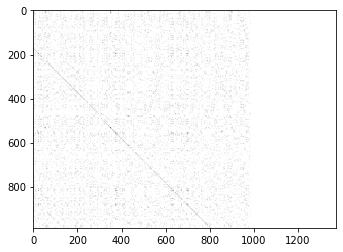

In [105]:
import pylab
import matplotlib.pyplot as plt # import the packages needed for the plot

pylab.gray() # this sets the color map to gray
pylab.imshow(numpy_data) # this displays the numpy_data array as an image 
pylab.show()

<AxesSubplot:>

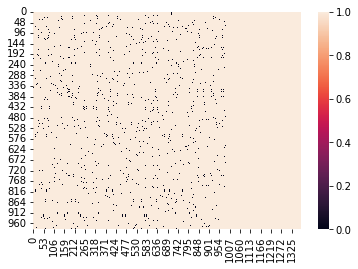

In [106]:
df2 = pd.DataFrame(numpy_data) 
sns.heatmap(df2)

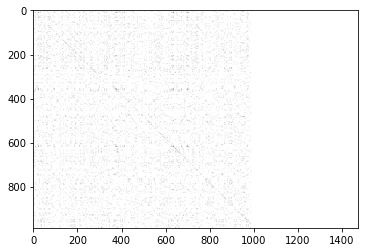

In [113]:
window = 3 # comparing 3 nucleotides at a time
data2 = [] # make an empty list 

for j in range(len(human) - window): 
# iterating over the length of the first sequence minus the window size (because comparing 3 nts at a time, 
# the last comparison would be the 3rd to last nucleotide)
    for i in range(len(mouse) - window): 
    # iterating over the length of the second sequence minus the window size
        data2.append(human[i : i + window] != mouse[j : j + window]) 
        # a comparison of 3 nucleotides of the same index range is made between the 2 sequences, 
        # and False is appended into the empty list if the two sequences are equal to each other 
        
numpy_data2 = np.array(data2).reshape(len(human) - window, len(mouse) - window) # reshape the data list into an array with the correct dimensions 



pylab.gray() # this sets the color map to gray
pylab.imshow(numpy_data2) # this displays the numpy_data array as an image 
pylab.show()

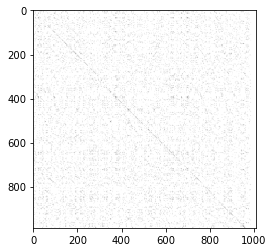

In [114]:
window = 3 # comparing 3 nucleotides at a time
data3 = [] # make an empty list 

for j in range(len(human) - window): 
# iterating over the length of the first sequence minus the window size (because comparing 3 nts at a time, 
# the last comparison would be the 3rd to last nucleotide)
    for i in range(len(horse) - window): 
    # iterating over the length of the second sequence minus the window size
        data3.append(human[i : i + window] != horse[j : j + window]) 
        # a comparison of 3 nucleotides of the same index range is made between the 2 sequences, 
        # and False is appended into the empty list if the two sequences are equal to each other 
        
numpy_data3 = np.array(data3).reshape(len(human) - window, len(horse) - window) # reshape the data list into an array with the correct dimensions 



pylab.gray() # this sets the color map to gray
pylab.imshow(numpy_data3) # this displays the numpy_data array as an image 
pylab.show()

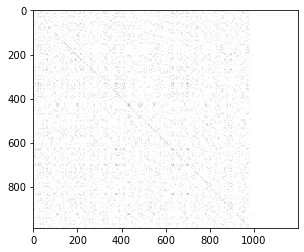

In [115]:
window = 3 # comparing 3 nucleotides at a time
data4 = [] # make an empty list 

for j in range(len(human) - window): 
# iterating over the length of the first sequence minus the window size (because comparing 3 nts at a time, 
# the last comparison would be the 3rd to last nucleotide)
    for i in range(len(cattle) - window): 
    # iterating over the length of the second sequence minus the window size
        data4.append(human[i : i + window] != cattle[j : j + window]) 
        # a comparison of 3 nucleotides of the same index range is made between the 2 sequences, 
        # and False is appended into the empty list if the two sequences are equal to each other 
        
numpy_data4 = np.array(data4).reshape(len(human) - window, len(cattle) - window) # reshape the data list into an array with the correct dimensions 



pylab.gray() # this sets the color map to gray
pylab.imshow(numpy_data4) # this displays the numpy_data array as an image 

In [30]:
one = 'ATCGATCG'

In [102]:
aligner = Align.PairwiseAligner() # create a PairwiseAligner object to store the match and mismatch scores
score = [] # make an empty list 

for i in range(len(human)): # iterating over the length of Fasta
    for j in range(len(human)): # iterating over the length of Fasta
        seq1 = human[i] # getting the nucleotide from the sequence to be aligned 
        seq2 = human[j] # getting the nucleotide from the sequence to be aligned 
        score.append(aligner.score(seq1,seq2)) 
        # perfroms sequence alignment between the 2 sequences and appends only the score of the sequence alignment to the empty list
        
alignments_score = np.array(score).reshape(len(human), len(human)) # reshape the data list into an array with the correct dimensions
print(alignments_score[:10])

[[1. 0. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


<AxesSubplot:>

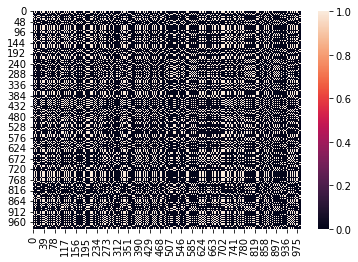

In [103]:
df = pd.DataFrame(alignments_score) 
sns.heatmap(df)

- bio python pairwise2 for pairwise alignment 
- for second part, could use pymol (movie or pictures of the differences; list some qualitative difference in the notebook) and 3D measurements